1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [21]:
import numpy as np 
import matplotlib.pyplot as plt

N = 500

mean, std = 3*np.random.random(), 2*np.random.random()

bins = 20

x = np.random.normal(mean, std, N)

bins_val, values = np.histogram(x, bins)
center_bins = 1/2*(values[:-1] + values[1:])

poissonError = 1/np.sqrt(N)

stdDef = 1.06*std*N**(-1/5)
GaussianFuncion = lambda x, mean, std: 1/(np.sqrt(2*np.pi*std**2))* np.exp(-1/2 * ((x - mean)/std)**2)

def GaussianForX(x, Lenght):

   xLin = np.linspace(x.min(), x.max(), Lenght)
   GaussianX = []

   for i in x:
      GaussianX.append(GaussianFuncion(xLin, i, stdDef))
   return xLin, GaussianX

def KDEf(GaussianX, N):
   
   x = np.sum(GaussianX, axis=0)
   return 1/N *x

xLin, GaussianX = GaussianForX(x, 500)

KDE = KDEf(GaussianX, 500)

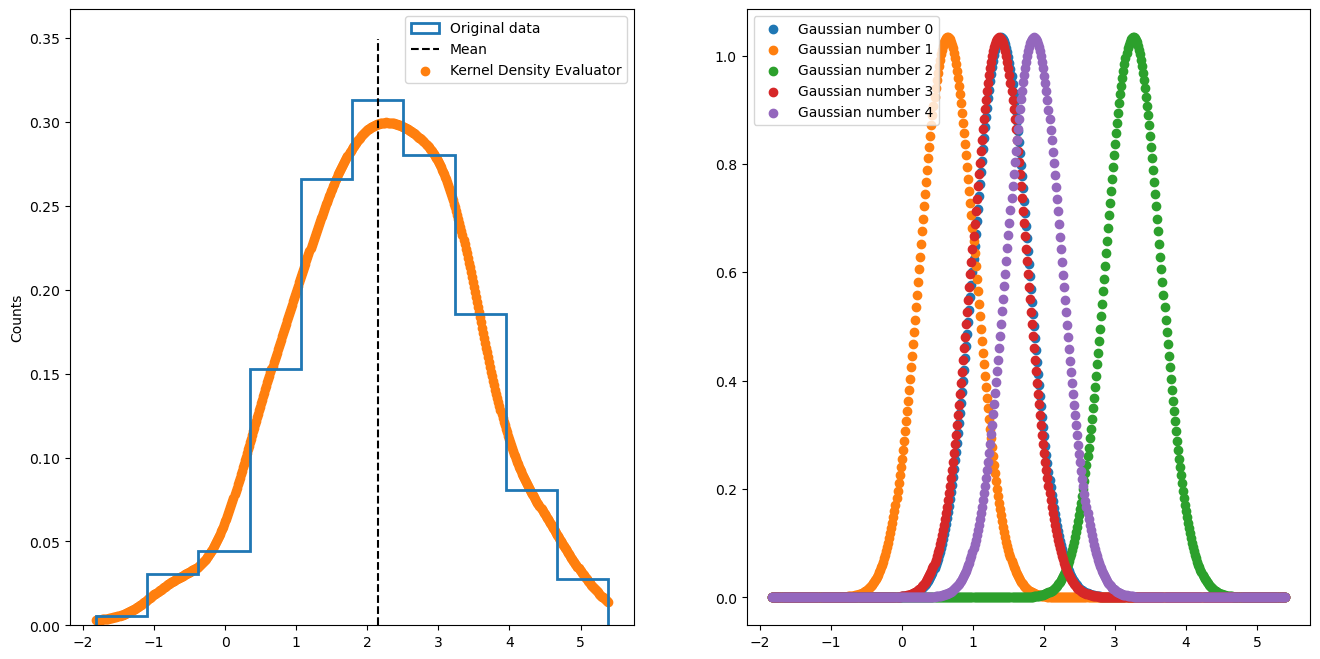

In [26]:


fig, axs = plt.subplots(1, 2, figsize =(16, 8))

ax = axs[0]
ax.hist(x, histtype='step', lw = 2, density=True, label="Original data")
ax.vlines(mean, 0, np.max(KDE) + 0.05, linestyles='dashed', color='black', label="Mean")
#ax.errorbar(center_bins, bins_val, poissonError)
ax.set_ylabel("Counts")

ax.scatter(xLin, KDE, label="Kernel Density Evaluator")

ax.legend()


ax = axs[1]

for i in range(5):
   ax.scatter(xLin, GaussianX[i], label=f"Gaussian number {i}")

ax.legend()



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2025-01-14 10:15:14--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35 [following]
--2025-01-14 10:15:15--  https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f979231e9176666e1dcb42e72.dl.dropboxusercontent.com/cd/0/inline/CiKXDu_i_392LqpzWVSQofMoq5gyNGA3X6Yd3RQlwhpNB1Azs8mRay64ECfUuA4qdafS2Pm4DX32KTeFGUF7GST-hy5VjONh5KZMALkE4J3FEQANIEfs8V_oLkCKDc90fv8/file# [following]
--2025-01-14 10:15:15--  https://uc2f979231e9176666e1dcb42e72.dl.dropboxusercontent.com/cd/

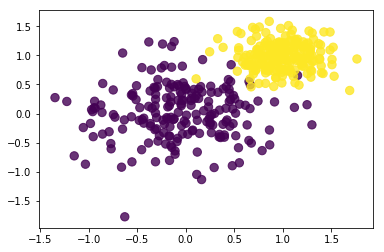

In [87]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot